In [4]:
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from numpy import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


def data_value(df, train, test):
	# initialize the column names of the continuous data
	continuous = ["t_web", "t_uf", "t_lf"]
	# performin min-max scaling each continuous feature column to
	# the range [0, 1]
	cs = MinMaxScaler()
	trainX = cs.fit_transform(train[continuous])
	testX = cs.transform(test[continuous])
	#print(testX)
	print(trainX)   
	return (trainX, testX)




def create_mlp(dim, regress=False):
	model = Sequential()
	model.add(Dense(8, input_dim=dim, activation="relu"))
	model.add(Dense(4, activation="relu"))
	# check to see if the regression node should be added
	if regress:
		model.add(Dense(1, activation="linear"))
	# return our model
	return model


# To load data

cols = ["t_web", "t_uf", "t_lf", "e_s"]
df = pd.read_csv(r"D:\MTP\my project\detail.csv", sep=",", header=None, names=cols)


(train, test) = train_test_split(df, test_size=0.35, random_state=1)
print(train)

EqStress = train["e_s"].max()
trainY = train["e_s"] / EqStress
testY = test["e_s"] / EqStress

print(" processing data")
(trainX, testX) = data_value(df, train, test)



model = create_mlp(trainX.shape[1], regress=True)
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss="mean_absolute_percentage_error", optimizer=opt)




print("[INFO] training model...")
history = model.fit(x=trainX, y=trainY,validation_data=(testX, testY),epochs=200)



# make predictions on the testing data
preds = model.predict(testX)
#print(preds)

x_in =np.array([[1,0.5,0.5 ]])
x_in.reshape(3,)
y_res=model.predict(x_in)
y_res.flatten()
print(y_res*EqStress)



diff = preds.flatten() - testY
percentDiff = (diff / testY) * 100
absPercentDiff = np.abs(percentDiff)
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

print(history.history.keys())
#%tensorboard --logdir logs/fit


    

    t_web  t_uf  t_lf      e_s
31      5     4     4  111.160
26      3     3     6  134.970
4       3     7     7  103.390
14      5     7     4  108.200
10      5     3     5  108.040
33      5     5     5  106.160
23      7     6     5   86.179
32      5     5     3  124.860
20      7     3     7   87.279
18      6     6     4   97.607
6       4     4     5  112.420
13      5     6     3  121.770
7       4     5     6  102.610
36      6     4     6   90.704
1       3     4     4  128.200
16      6     4     7   88.380
0       3     3     3  155.010
15      6     3     6   97.780
5       4     3     4  118.570
11      5     4     6   97.007
9       4     7     3  131.150
8       4     6     7   96.970
12      5     5     7   93.031
37      6     6     6   88.171
 processing data
[[0.5  0.25 0.25]
 [0.   0.   0.75]
 [0.   1.   1.  ]
 [0.5  1.   0.25]
 [0.5  0.   0.5 ]
 [0.5  0.5  0.5 ]
 [1.   0.75 0.5 ]
 [0.5  0.5  0.  ]
 [1.   0.   1.  ]
 [0.75 0.75 0.25]
 [0.25 0.25 0.5 ]
 [0.5  0.7

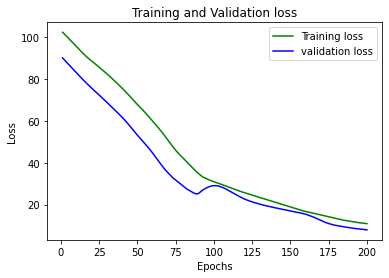

In [5]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,201)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [3]:
ann_viz(model, view=True, filename=”network.gv”, title=”MyNeural Network”)

SyntaxError: invalid character in identifier (<ipython-input-3-9e02cfefa239>, line 1)

In [1]:
pip install ann_visualizer

Note: you may need to restart the kernel to use updated packages.


'F:\anaconda\anaconda' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
loss_train = history.history['acc']
loss_val = history.history['val_acc']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
print(history.history.keys())